In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import sklearn.datasets
import torchvision.models
import torchvision.transforms
import sklearn.preprocessing

In [2]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = numeros['target']

In [3]:
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X)
X_train = X_train.reshape((n_imagenes, 8,8))
X_train = np.expand_dims(X_train,1)

In [4]:
inputs = torch.autograd.Variable(torch.Tensor(X_train).float())
targets = torch.autograd.Variable(torch.Tensor(Y).long())

In [5]:
mean = inputs.mean(dim=0)
std = inputs.std(dim=0)
std[std==0]=1.0

for i in range(len(inputs)):
    inputs[i] = (inputs[i]-mean)/std
np.shape(inputs)

torch.Size([1797, 1, 8, 8])

In [99]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=3),
            torch.nn.Conv2d(16,8,kernel_size=3),
            torch.nn.Conv2d(8,10,kernel_size=3))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(10,8,kernel_size=3),
            torch.nn.ConvTranspose2d(8,16,kernel_size=3),
            torch.nn.ConvTranspose2d(16,1,kernel_size=3))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [100]:
# inicializa modelo, loss y optimizador
num_epochs = 100
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)

In [101]:
output = model(inputs)
np.shape(output)

torch.Size([1797, 1, 8, 8])

In [9]:
# entrenamiento
L=[]
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    L.append(loss.item())
    print(epoch)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


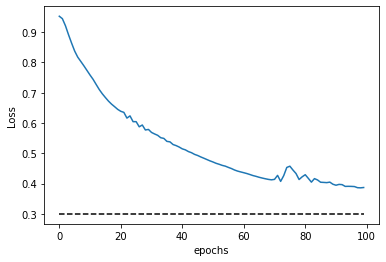

In [10]:
n = np.arange(num_epochs)
plt.plot(n,L)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.hlines(0.3,linestyles='dashed',xmin=n[0],xmax=n[-1])

In [11]:
x_transform = model(inputs)
latent_space = model.encoder(inputs)

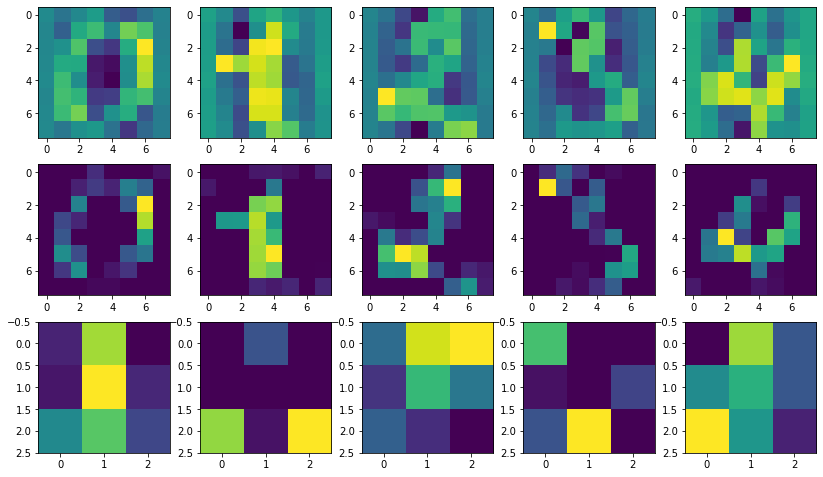

In [12]:
# muestra los resultados de las cuatro capas de convolucion
plt.figure(figsize=(14,14))
offset = 0
for i in range(5):
    plt.subplot(5,5,i+1) #imagenes originales
    plt.imshow(inputs[i+offset][0].detach().numpy())
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][2].detach().numpy())

In [13]:
n_p = 0
for m in model.parameters():
    n_p+= m.flatten().size()[0]
print(n_p)

2145


In [15]:
latent_space.flatten().size()

torch.Size([129384])

In [106]:
def complexity(y):
    class Autoencoder(torch.nn.Module):
        def __init__(self):
            super(Autoencoder,self).__init__()
            self.encoder = torch.nn.Sequential(
                torch.nn.Conv2d(1, 16, kernel_size=3),
                torch.nn.Conv2d(16,8,kernel_size=3),
                torch.nn.Conv2d(8,y,kernel_size=3))
            self.decoder = torch.nn.Sequential(
                torch.nn.ConvTranspose2d(y,8,kernel_size=3),
                torch.nn.ConvTranspose2d(8,16,kernel_size=3),
                torch.nn.ConvTranspose2d(16,1,kernel_size=3))
        def forward(self,x):
            x = self.encoder(x)
            x = self.decoder(x)
            return x
    # inicializa modelo, loss y optimizador
    num_epochs = 100
    model = Autoencoder()
    distance = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)
    print('Comenzamos a calcular para y= '+str(y))
    L=[]
    for epoch in range(num_epochs):
        output = model(inputs)
        loss = distance(output, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        L.append(loss.item())
    print('Acabamos de terminar con loss = '+str(L[-1]))
    latent_space = model.encoder(inputs)
    n_p = 0
    for m in model.parameters():
        n_p+= m.flatten().size()[0]
    n_l=latent_space.flatten().size()
    print('Acabamos de terminar con np = '+str(n_p)+' con dim = '+str(n_l[0]))
    return [n_p,n_l[0],L[-1]]

In [107]:
y=np.arange(1,11)
data=[]
for i in y:
    data.append(complexity(i))

Comenzamos a calcular para y= 1
Acabamos de terminar con loss = 0.7822249531745911
Acabamos de terminar con np = 2786 con dim = 7188
Comenzamos a calcular para y= 2
Acabamos de terminar con loss = 0.6466318964958191
Acabamos de terminar con np = 2931 con dim = 14376
Comenzamos a calcular para y= 3
Acabamos de terminar con loss = 0.5514754056930542
Acabamos de terminar con np = 3076 con dim = 21564
Comenzamos a calcular para y= 4
Acabamos de terminar con loss = 0.4739183783531189
Acabamos de terminar con np = 3221 con dim = 28752
Comenzamos a calcular para y= 5
Acabamos de terminar con loss = 0.4132101535797119
Acabamos de terminar con np = 3366 con dim = 35940
Comenzamos a calcular para y= 6
Acabamos de terminar con loss = 0.36251044273376465
Acabamos de terminar con np = 3511 con dim = 43128
Comenzamos a calcular para y= 7
Acabamos de terminar con loss = 0.3135085701942444
Acabamos de terminar con np = 3656 con dim = 50316
Comenzamos a calcular para y= 8
Acabamos de terminar con loss 

In [109]:
data

[[2786, 7188, 0.7822249531745911],
 [2931, 14376, 0.6466318964958191],
 [3076, 21564, 0.5514754056930542],
 [3221, 28752, 0.4739183783531189],
 [3366, 35940, 0.4132101535797119],
 [3511, 43128, 0.36251044273376465],
 [3656, 50316, 0.3135085701942444],
 [3801, 57504, 0.26414281129837036],
 [3946, 64692, 0.24869927763938904],
 [4091, 71880, 0.20504362881183624]]

In [112]:
dat=np.array(data)

In [114]:
np=dat[:,0]
nl=dat[:,1]
loss=dat[:,2]

Text(0, 0.5, 'loss')

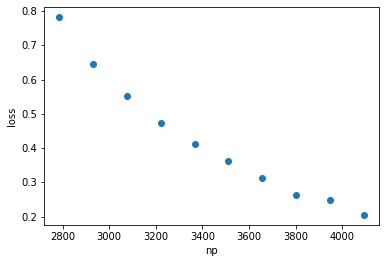

In [116]:
plt.scatter(np,loss)
plt.xlabel('np')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

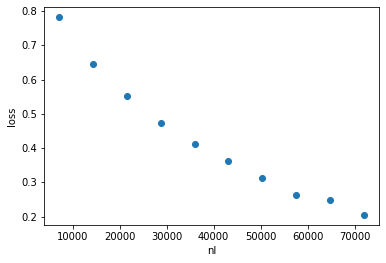

In [117]:
plt.scatter(nl,loss)
plt.xlabel('nl')
plt.ylabel('loss')

Text(0, 0.5, 'nl')

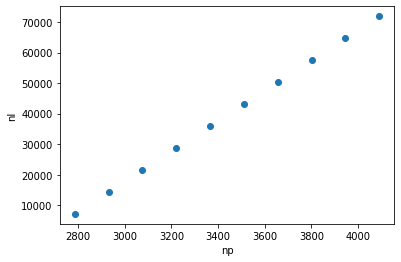

In [118]:
plt.scatter(np,nl)
plt.xlabel('np')
plt.ylabel('nl')